# Project: Adiddas Data
###
### Table of Contents
#####        Introduction
#####        Data Cleaning
#####        Exploratory Data Analysis
#####        Machine Learning


###


# Introduction:
An Adidas sales dataset is a collection of data that includes information on the sales of Adidas products. This type of dataset may include details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information.




#



 

##  Analysis of the DataSet (questions that is analyized in the dataset):
  

####    1- What Percentage of Sales and Operating Profit in  Different Region.

####    2- What is the top sales method?

####    3- Top selling products.

####    4- Who are the Top Retailersfor total sales and Operating Profit?

####    5- What aboat sales over month?

####    6- Which Sales Method is the most at every region?

####    7-  Mean of price for each unit of product in each region.

####    8- Price Per Product Distribution.

####    9- Relationship between Operating Profit and city using boxplot.

####    10- Relationship between Region and Price per Unit .

####    11- Top 10 city with highest Total Sales.

####    12- what is total sales for sales method .
##

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [123]:
data = pd.read_csv("Adiddas Data.csv")
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store


# Data Cleaning:

In [124]:
data.shape

(9648, 12)

In [125]:
data.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Sales Method'],
      dtype='object')

In [126]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              7
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [127]:
data["Region"].value_counts()


Region
West         2446
Northeast    2376
Midwest      1869
South        1726
Southeast    1224
Name: count, dtype: int64

In [128]:
data["Region"] = data["Region"].fillna(value = "West")

In [129]:
data["Region"].isnull().sum()

0

In [130]:
data["Price per Unit"].unique()


array(['$50.00 ', '$40.00 ', '$45.00 ', '$60.00 ', nan, '$55.00 ',
       '$65.00 ', '$70.00 ', '$25.00 ', '$35.00 ', '$30.00 ', '$80.00 ',
       '$75.00 ', '$20.00 ', '$85.00 ', '$100.00 ', '$90.00 ', '$95.00 ',
       '$15.00 ', '$10.00 ', '$110.00 ', '$105.00 ', '$47.00 ', '$36.00 ',
       '$41.00 ', '$46.00 ', '$44.00 ', '$58.00 ', '$48.00 ', '$39.00 ',
       '$43.00 ', '$59.00 ', '$56.00 ', '$49.00 ', '$54.00 ', '$64.00 ',
       '$53.00 ', '$61.00 ', '$62.00 ', '$68.00 ', '$52.00 ', '$66.00 ',
       '$51.00 ', '$24.00 ', '$34.00 ', '$33.00 ', '$23.00 ', '$32.00 ',
       '$38.00 ', '$29.00 ', '$37.00 ', '$27.00 ', '$42.00 ', '$72.00 ',
       '$63.00 ', '$69.00 ', '$76.00 ', '$67.00 ', '$57.00 ', '$28.00 ',
       '$18.00 ', '$19.00 ', '$71.00 ', '$78.00 ', '$73.00 ', '$74.00 ',
       '$83.00 ', '$82.00 ', '$98.00 ', '$77.00 ', '$88.00 ', '$86.00 ',
       '$14.00 ', '$9.00 ', '$97.00 ', '$81.00 ', '$79.00 ', '$96.00 ',
       '$84.00 ', '$89.00 ', '$103.00 ', '$101.00 ', '$

In [131]:
data["Price per Unit"] = data["Price per Unit"].str.replace("$","")
data["Price per Unit"]

0       50.00 
1       50.00 
2       40.00 
3       45.00 
4       60.00 
         ...  
9643    50.00 
9644    41.00 
9645    41.00 
9646    42.00 
9647    29.00 
Name: Price per Unit, Length: 9648, dtype: object

In [132]:
data["Price per Unit"] = data["Price per Unit"].astype("float")
data["Price per Unit"]

0       50.0
1       50.0
2       40.0
3       45.0
4       60.0
        ... 
9643    50.0
9644    41.0
9645    41.0
9646    42.0
9647    29.0
Name: Price per Unit, Length: 9648, dtype: float64

In [133]:
data["Price per Unit"] = data["Price per Unit"].fillna(value = data["Price per Unit"].mean())

In [134]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   object 
 9   Total Sales       9648 non-null   object 
 10  Operating Profit  9648 non-null   object 
 11  Sales Method      9648 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 904.6+ KB


In [136]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,"54,000","$16,200",In-store


In [137]:
data["Units Sold"] = data["Units Sold"].str.replace(",","")
data["Units Sold"]

0       1200
1       1000
2       1000
3        850
4        900
        ... 
9643      64
9644     105
9645     184
9646      70
9647      83
Name: Units Sold, Length: 9648, dtype: object

In [138]:
data["Units Sold"] = data["Units Sold"].astype("int")
data["Units Sold"] 


0       1200
1       1000
2       1000
3        850
4        900
        ... 
9643      64
9644     105
9645     184
9646      70
9647      83
Name: Units Sold, Length: 9648, dtype: int32

In [139]:
data["Total Sales"] = data["Total Sales"].str.replace(",","")
data["Total Sales"]

0       60000
1       50000
2       40000
3       38250
4       54000
        ...  
9643      320
9644      431
9645      754
9646      294
9647      241
Name: Total Sales, Length: 9648, dtype: object

In [140]:
data["Total Sales"] = data["Total Sales"].astype("int")
data["Total Sales"]

0       60000
1       50000
2       40000
3       38250
4       54000
        ...  
9643      320
9644      431
9645      754
9646      294
9647      241
Name: Total Sales, Length: 9648, dtype: int32

In [141]:
data["Operating Profit"] = data["Operating Profit"].str.replace("$","").str.replace(",","")
data["Operating Profit"]

0       30000 
1       15000 
2       14000 
3       13388 
4       16200 
         ...  
9643       90 
9644      138 
9645      279 
9646      123 
9647       65 
Name: Operating Profit, Length: 9648, dtype: object

In [142]:
data["Operating Profit"] =data["Operating Profit"].astype("int")
data["Operating Profit"]

0       30000
1       15000
2       14000
3       13388
4       16200
        ...  
9643       90
9644      138
9645      279
9646      123
9647       65
Name: Operating Profit, Length: 9648, dtype: int32

In [143]:
data["Invoice Date"] = pd.to_datetime(data["Invoice Date"])
data["Invoice Date"]

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
9643   2021-01-24
9644   2021-01-24
9645   2021-02-22
9646   2021-02-22
9647   2021-02-22
Name: Invoice Date, Length: 9648, dtype: datetime64[ns]

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int32         
 9   Total Sales       9648 non-null   int32         
 10  Operating Profit  9648 non-null   int32         
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(6)
memory usage: 791.6+ KB


In [145]:
data["Month"] = data["Invoice Date"].dt.month

In [146]:
data["Years"] = data["Invoice Date"].dt.year

In [147]:
data.drop("Invoice Date",axis = 1, inplace = True)


In [148]:
data.drop("Retailer ID",axis = 1, inplace = True)

In [149]:
data.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Years
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store,1,2020
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store,1,2020
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store,1,2020
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store,1,2020
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store,1,2020


In [150]:
data["Product"].value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1605
Men's aparel                    1
Name: count, dtype: int64

In [151]:
data["Product"] = data["Product"].replace("Men's aparel",np.nan)


In [152]:
data =data.dropna()
data.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Years
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store,1,2020
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store,1,2020
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store,1,2020
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store,1,2020
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store,1,2020


In [153]:
data.isnull().sum()

Retailer            0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
Month               0
Years               0
dtype: int64

# Exploratory Data Analysis:


In [154]:
data.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Month,Years
count,9647.000000,9647.000000,9647.000000,9647.000000,9647.000000,9647.000000
mean,45.214101,256.863377,9322.736809,3441.242459,6.458485,2020.865139
std,14.704522,214.163058,14185.031199,5418.065205,3.454799,0.341592
min,7.000000,0.000000,0.000000,0.000000,1.000000,2020.000000
25%,35.000000,106.000000,425.500000,192.000000,3.000000,2021.000000
50%,45.000000,176.000000,958.000000,437.000000,6.000000,2021.000000
75%,55.000000,350.000000,15000.000000,5203.000000,9.000000,2021.000000
max,110.000000,1275.000000,82500.000000,39000.000000,12.000000,2021.000000


####
##### 1- What Percentage of Sales and Operating Profit in Different Region.

In [155]:
region_sales=data.groupby('Region')['Total Sales'].sum()
region_sales

Region
Midwest      13560070
Northeast    18578487
South        14407736
Southeast    16317146
West         27073003
Name: Total Sales, dtype: int32

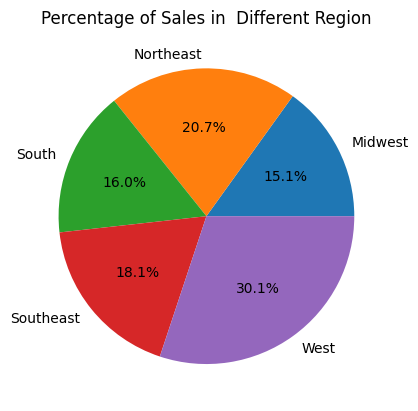

In [156]:


plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Percentage of Sales in  Different Region')
plt.show()


       The West region has the highest the number of total sales among all regions.
##

<Axes: xlabel='Region', ylabel='Operating Profit'>

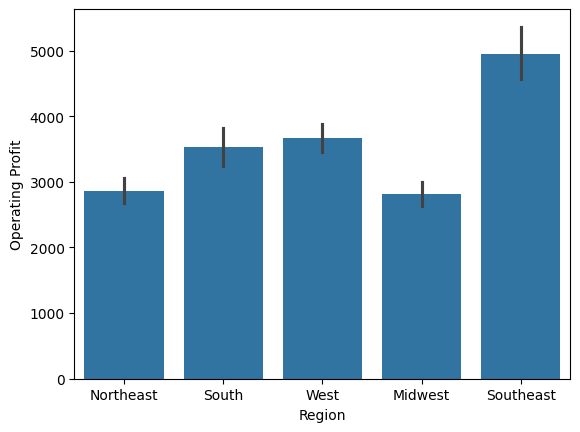

In [157]:
sns.barplot(data = data , x = data["Region"], y= data["Operating Profit"])

    The Southeast has the highest Operating Profit among all regions.      

#
##### 2- What is the top Sales Method?


In [158]:
data_sales_method = data["Sales Method"].value_counts()
data_sales_method

Sales Method
Online      4889
Outlet      3018
In-store    1740
Name: count, dtype: int64

In [159]:
sales_method = data_sales_method.index
count = data_sales_method.values

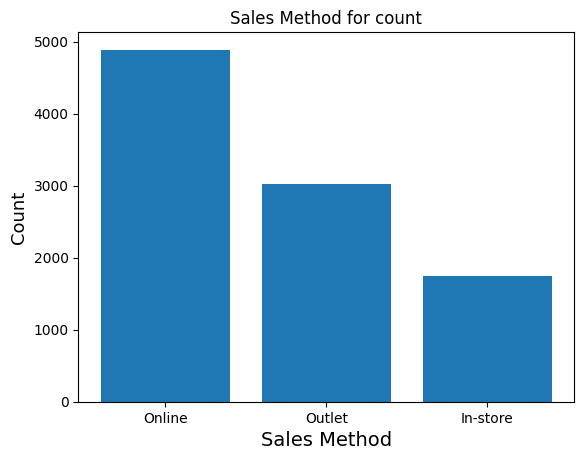

In [160]:

plt.bar(sales_method , count)
plt.title("Sales Method for count")
plt.xlabel("Sales Method",fontsize = 14)
plt.ylabel("Count",fontsize = 13)

plt.show()


    The online sales method has the highest total sales among all Sales Method

#
#####  3- Top selling products.


In [161]:
top_selling_products = data.groupby('Product')['Total Sales'].mean()
top_selling_products

Product
Men's Apparel                 7675.330218
Men's Athletic Footwear       9544.975155
Men's Street Footwear        12970.601863
Women's Apparel              11134.272388
Women's Athletic Footwear     6639.623288
Women's Street Footwear       7960.393657
Name: Total Sales, dtype: float64

In [162]:
product = top_selling_products.index
total_sales = top_selling_products.values

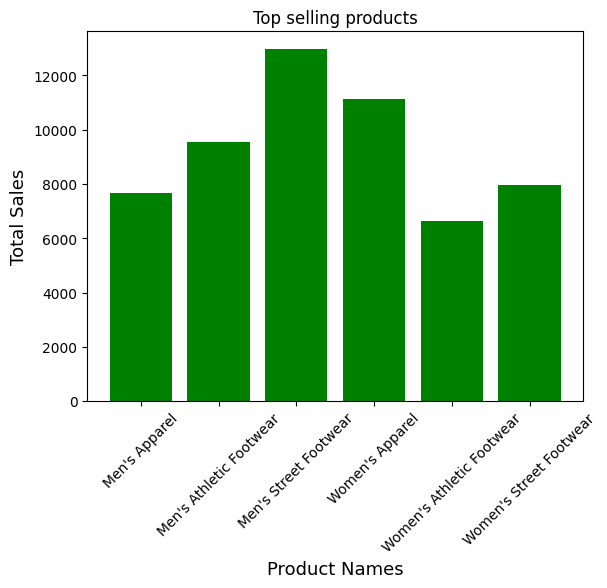

In [163]:
plt.bar( product,total_sales,color = "g")
plt.xticks(rotation=45)
plt.title("Top selling products")
plt.xlabel("Product Names",fontsize = 13)
plt.ylabel("Total Sales",fontsize = 13)
plt.show()

    Best selling product in average (Men's Street Footwear) in all our retailers

#
##### 4- Who are the Top Retailers for total sales and Operating Profit?


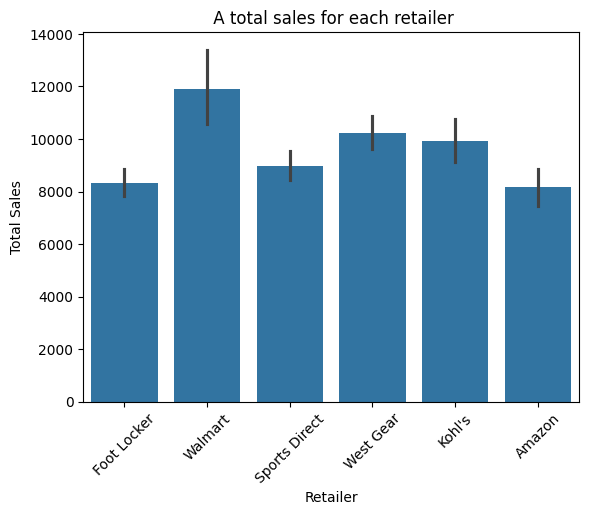

In [228]:
sns.barplot(data = data , x = "Retailer" , y = "Total Sales")
plt.xticks(rotation = 45)
plt.title(" A total sales for each retailer")
plt.show()


In [166]:
top_retailers = data.groupby("Retailer")["Operating Profit"].sum()
top_retailers

Retailer
Amazon           2881885
Foot Locker      8056150
Kohl's           3681153
Sports Direct    7433383
Walmart          2578226
West Gear        8566869
Name: Operating Profit, dtype: int32

In [167]:
name_retailers = top_retailers.index
operating_profit = top_retailers.values

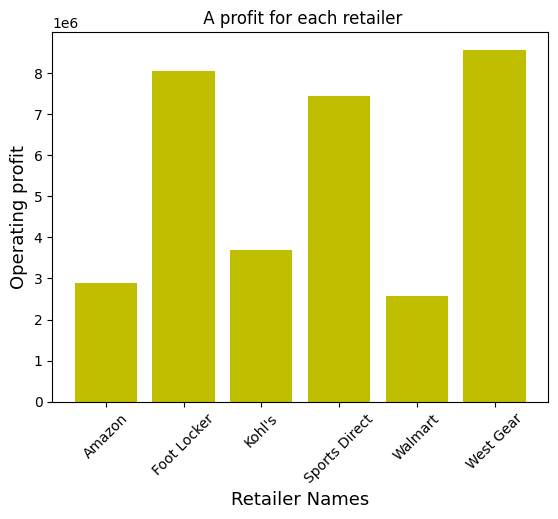

In [168]:
plt.bar(name_retailers , operating_profit , color = 'y')
plt.title(" A profit for each retailer")
plt.xlabel("Retailer Names",fontsize = 13)
plt.ylabel("Operating profit",fontsize = 13)
plt.xticks(rotation=45)
plt.show()

      The West Gear retailer has the highest Operating profit among all Retailers



##
#### 5- What aboat sales over month?


In [169]:
sales_over_month = data.groupby(["Month","Years"])["Total Sales"].sum().reset_index()
sales_over_month 


,Month,Years,Total Sales
0,1,2020,1625381
1,1,2021,5522556
2,2,2020,1499801
3,2,2021,4610236
4,3,2020,1712062
5,3,2021,3914875
6,4,2020,2460705
7,4,2021,4773312
8,5,2020,1691806
9,5,2021,6358982


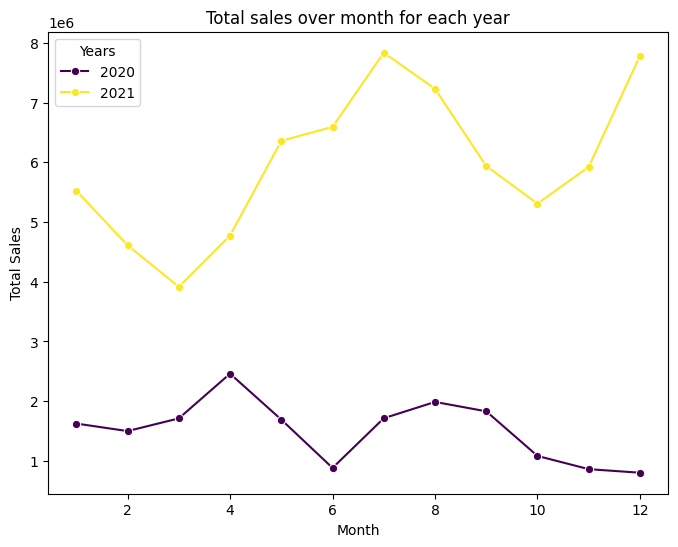

In [170]:
palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(8, 6))
sns.lineplot(data = sales_over_month , x = "Month" ,y = "Total Sales", hue = "Years" ,marker="o", palette= palette) 

plt.title("Total sales over month for each year")
plt.show()


              This graph shows sales over the months for each year

#
#### 6- Which Sales Method is the most at every region?

In [171]:
data.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Years
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store,1,2020
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store,1,2020
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store,1,2020
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store,1,2020
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store,1,2020


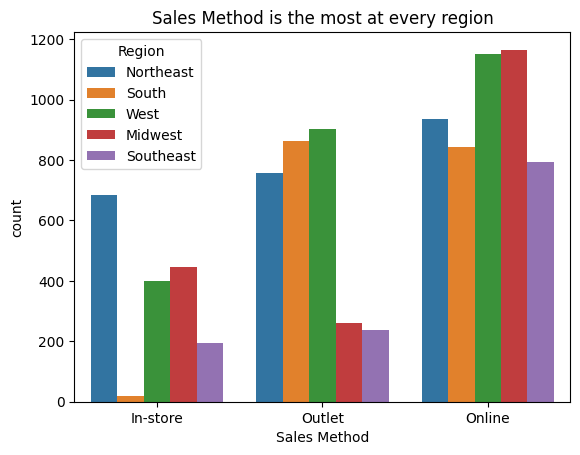

In [172]:
sns.countplot(data = data , x = "Sales Method" , hue = "Region" )
plt.title("Sales Method is the most at every region")
plt.show()

##
#### 7-  Mean of price for each unit of product in each region

In [173]:
data.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Years
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store,1,2020
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store,1,2020
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store,1,2020
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store,1,2020
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store,1,2020


In [174]:
price_region = data.groupby("Region")["Price per Unit"].mean()
price_region

Region
Midwest      40.357410
Northeast    46.679670
South        38.240565
Southeast    50.183007
West         49.922951
Name: Price per Unit, dtype: float64

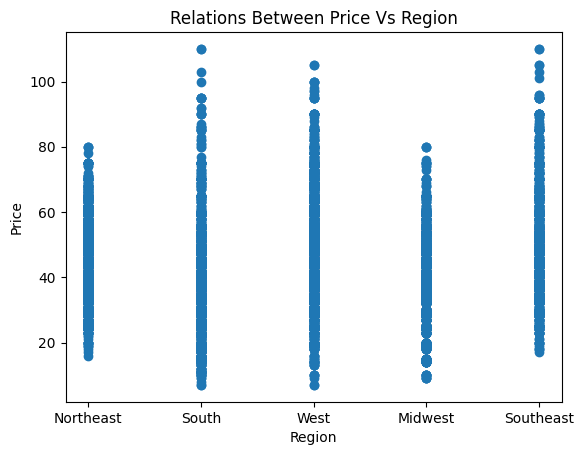

In [175]:
plt.scatter(data['Region'], data['Price per Unit'])
plt.title("Relations Between Price Vs Region")
plt.xlabel('Region')
plt.ylabel('Price')
plt.show()

##
#### 8- Price Per Product Distribution.


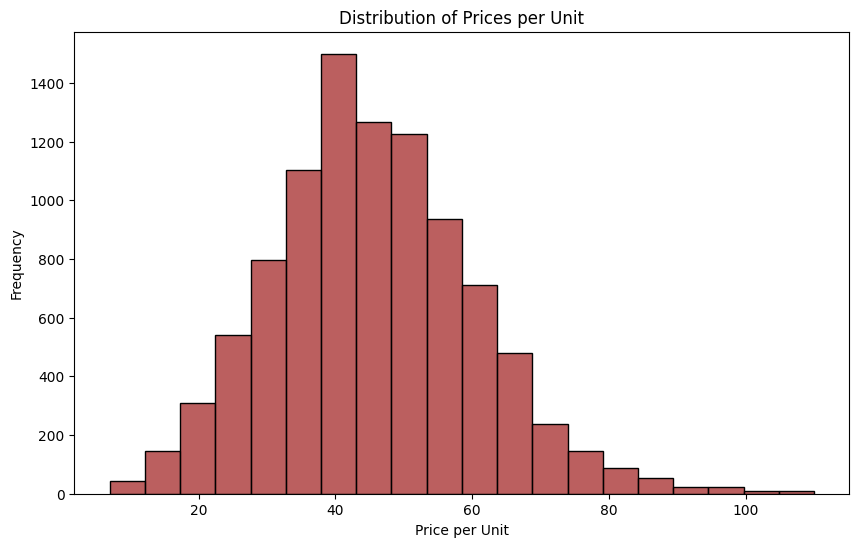

In [176]:
plt.figure(figsize=(10, 6))

sns.histplot(data['Price per Unit'], bins = 20,  color='brown')
plt.title('Distribution of Prices per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

##
#### 9- Relationship between Operating Profit and city using boxplot.

C:\Users\El-Mostafa\AppData\Local\Temp\ipykernel_11368\3702577126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='City', y='Price per Unit', palette='PuBuGn')


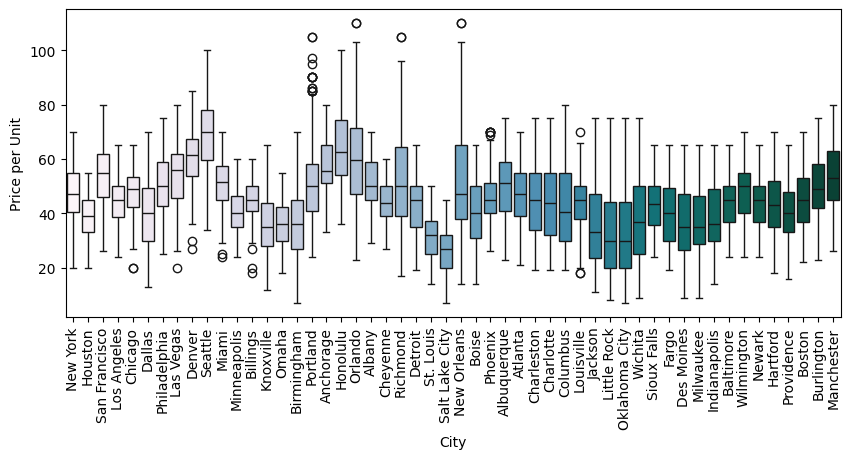

In [177]:
plt.figure(figsize=(10,4))

sns.boxplot(data=data, x='City', y='Price per Unit', palette='PuBuGn')
plt.xticks(rotation=90)
plt.show()

##
#### 10- Relationship between Region and Price per Unit.

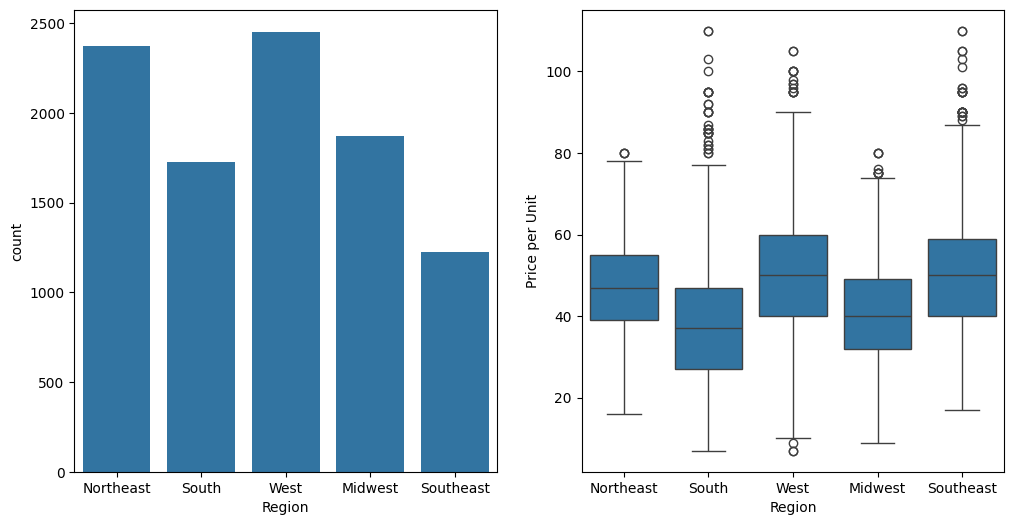

In [178]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot(x='Region', data=data)

plt.subplot(1,2,2)
sns.boxplot(data=data, x='Region', y='Price per Unit')
plt.show()

##
####  11- Top 10 city with highest Total Sales.

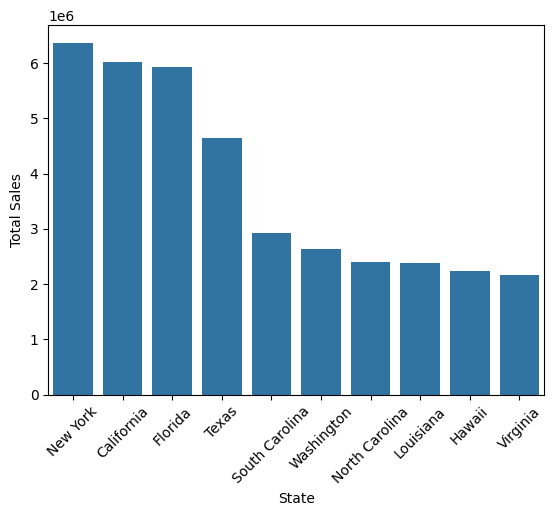

In [179]:
state = data.groupby('State')["Total Sales"].sum().reset_index().sort_values('Total Sales', ascending=False).iloc[:10,:]
sns.barplot(data = state, x = 'State', y='Total Sales')
plt.xticks( rotation=45)
plt.show()

##
#### 12- what is total sales for sales method with retailer.


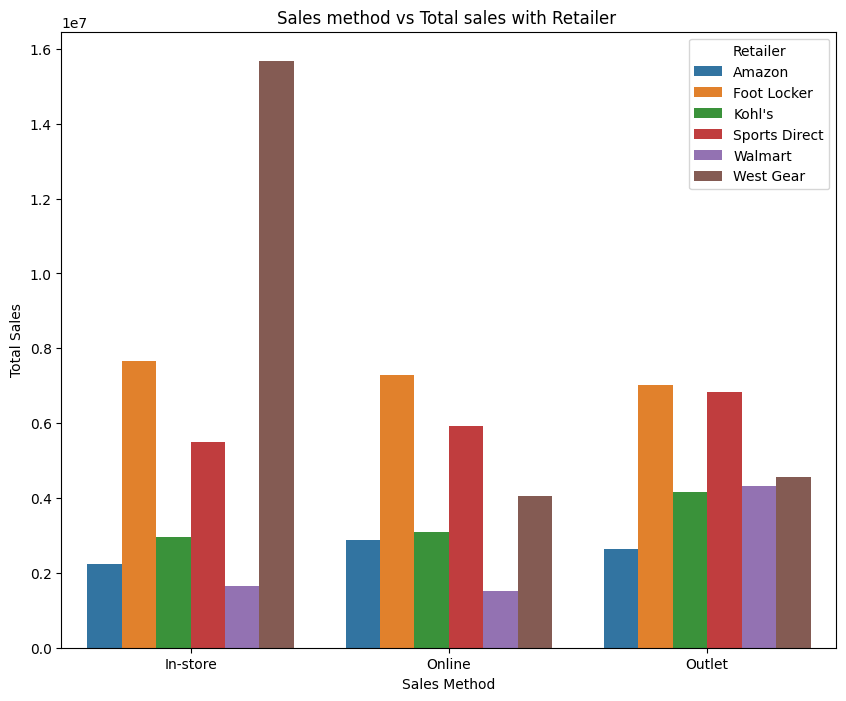

In [180]:
method_group = data.groupby(['Sales Method', 'Retailer']).sum().reset_index()
method_group
plt.figure(figsize=(10,8))
sns.barplot(x='Sales Method', y='Total Sales', data=method_group, hue="Retailer")
plt.title("Sales method vs Total sales with Retailer ")
plt.show()

13-relation between sales , total and Retailer.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

method_group = data.groupby(['Sales Method', 'Retailer']).sum().reset_index()

plt.figure(figsize=(20, 16))
sns.barplot(x='Sales Method', y='Total Sales', data=method_group, hue='Retailer')
plt.title('Sales method vs Total sales with Retailer')
plt.show()
